In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
x = np.linspace(0,50,501)

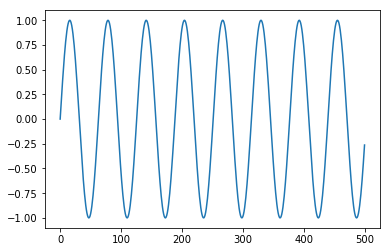

In [68]:
plt.plot(np.sin(x))

In [19]:
df = pd.DataFrame(data=(np.sin(x)),index=x, columns=['SineValue'])

In [22]:
df.sample(4)

,SineValue
26.5,0.979358
17.1,-0.984065
12.7,0.133232
32.2,0.706169


In [24]:
# 10% of whole data would be test data

In [25]:
500*.1

50.0

In [39]:
test_df= df.iloc[451:,:]
train_df= df.iloc[:451,:]

In [40]:
test_df.shape ,train_df.shape, df.shape

((50, 1), (451, 1), (501, 1))

In [42]:
test_df.head()

,SineValue
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [43]:
# y need to scale the data as y is again feeded into the neural netwrok

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
scaler.fit(train_df)

MinMaxScaler()

In [48]:
scaled_train = scaler.transform(train_df)
scaled_test = scaler.transform(test_df)

### timeseriesdata

In [49]:
# need to provide the data via timeseriesdata generator

In [50]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [77]:
len_output = 4
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length= len_output, batch_size= batch_size)

In [78]:
len(scaled_train)

451

In [79]:
len(generator)

447

In [80]:
X,y = generator[0]

In [81]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041]]])

In [74]:
y

array([[0.79923759]])

In [82]:
scaled_train[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [83]:
# so now to cover all the seasonlity, will include length as 50.

len_output = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length= len_output, batch_size= batch_size)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [85]:
n_features = 1

In [86]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(len_output,n_features)))

model.add(Dense(1))

model.compile( optimizer='adam', loss='mse')

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit_generator(generator, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 2s 4ms/step - loss: 0.0031
Epoch 2/5
401/401 [==============================] - 2s 5ms/step - loss: 3.6510e-04A: 0s - loss: 3.9522
Epoch 3/5
401/401 [==============================] - 2s 5ms/step - loss: 2.4515e-05
Epoch 4/5
401/401 [==============================] - 2s 4ms/step - loss: 3.7980e-04
Epoch 5/5
401/401 [==============================] - 2s 5ms/step - loss: 7.3511e-05


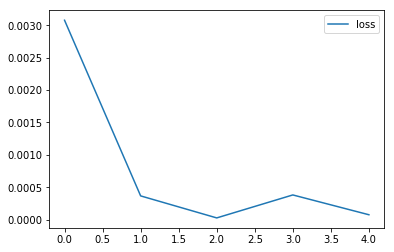

In [89]:
losses = pd.DataFrame(model.history.history).plot()

In [91]:
model.history.history

{'loss': [0.0030810947064310312,
  0.0003650980652309954,
  2.4515115001122467e-05,
  0.0003797999524977058,
  7.351145177381113e-05]}

In [121]:
# evaluate the model for one last batch in train data

test_pred = []

eval_batch = scaled_train[-len_output:]

eval_batch=eval_batch.reshape((1,len_output,n_features))


In [117]:
eval_batch.shape

(1, 50, 1)

In [118]:
model.predict(eval_batch)

array([[0.94858074]], dtype=float32)

In [122]:
scaled_test[0]

# both are similar

array([0.94955134])

In [124]:
# evaluate the model for complete test data

test_pred = []

eval_batch = scaled_train[-len_output:]

eval_batch=eval_batch.reshape((1,len_output,n_features))

for i in range(len(test_df)):
    
    pred = model.predict(eval_batch)[0]
    
    test_pred.append(pred)
    
    eval_batch = np.append(eval_batch[:,1:,:],[[pred]],axis=1)

In [136]:
test_pred = np.array([i[0] for i in test_pred])
# test_pred[0][0]

In [141]:
test_pred.

(50,)

In [140]:
test_pred = scaler.inverse_transform(test_pred.reshape())

ValueError: Expected 2D array, got 1D array instead:
array=[0.94858074 0.9675195  0.9815793  0.99064386 0.9943519  0.9931831
 0.9872948  0.9765323  0.9610359  0.9413383  0.91759944 0.8900483
 0.8589398  0.82487327 0.787999   0.7485379  0.7069822  0.6639772
 0.6195272  0.5740233  0.52800786 0.48202276 0.4362397  0.3910516
 0.34726545 0.30516887 0.26508677 0.22765836 0.19338356 0.16268921
 0.13557975 0.11278589 0.09453389 0.0808728  0.07170278 0.06740858
 0.06792013 0.0728919  0.08211236 0.09571043 0.11337715 0.13451266
 0.159027   0.18689394 0.21764961 0.25081328 0.28628308 0.32414562
 0.3636928  0.4046983 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [137]:
test_df['Predictions'] = test_pred

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


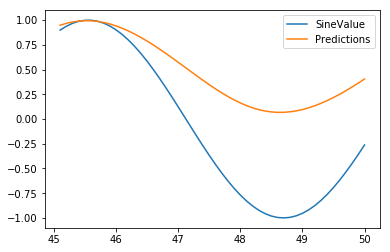

In [139]:
test_df.plot()